In [6]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime

In [2]:
#Load or Read the data
data = df =pd.read_csv(r"C:\Users\USER\Desktop\Capstone_Project\202305-divvy-tripdata.csv")

In [3]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.93,-87.65,member
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.94,-87.69,member


In [4]:
#Rename the columns 

data = data.rename(columns={
    'ride_id': 'trip_id',
    'rideable_type': 'bikeid',
    'started_at': 'start_time',
    'ended_at': 'end_time',
    'start_station_name': 'from_station_name',
    'start_station_id': 'from_station_id',
    'end_station_name': 'to_station_name',
    'end_station_id': 'to_station_id',
    'member_casual': 'usertype'
})

In [14]:
#summary of data
data.head(10)



,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member
5,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,Clinton St & Madison St,TA1305000032,McClurg Ct & Ohio St,TA1306000029,41.882752,-87.641190,41.892592,-87.617289,member
6,31EFCCB05F12D8EF,docked_bike,2023-05-09 14:13:40,2023-05-09 14:47:20,DuSable Lake Shore Dr & Monroe St,13300,Adler Planetarium,13431,41.880958,-87.616743,41.866095,-87.607267,casual
7,71DFF834E1D3CE0B,classic_bike,2023-05-06 16:47:22,2023-05-06 16:52:13,Shore Dr & 55th St,TA1308000009,Harper Ave & 59th St,KA1503000070,41.795212,-87.580715,41.787943,-87.588315,member
8,2117485899B4CEA4,classic_bike,2023-05-15 12:47:26,2023-05-15 13:00:05,Clark St & Schiller St,TA1309000024,Franklin St & Lake St,TA1307000111,41.907993,-87.631501,41.885837,-87.635500,member
9,811149F69AAE82DD,electric_bike,2023-05-19 05:44:26,2023-05-19 05:47:24,Clinton St & Madison St,TA1305000032,Kingsbury St & Kinzie St,KA1503000043,41.882651,-87.641442,41.889177,-87.638506,member


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604827 entries, 0 to 604826
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            604827 non-null  object 
 1   bikeid             604827 non-null  object 
 2   start_time         604827 non-null  object 
 3   end_time           604827 non-null  object 
 4   from_station_name  515587 non-null  object 
 5   from_station_id    515587 non-null  object 
 6   to_station_name    509560 non-null  object 
 7   to_station_id      509560 non-null  object 
 8   start_lat          604827 non-null  float64
 9   start_lng          604827 non-null  float64
 10  end_lat            604117 non-null  float64
 11  end_lng            604117 non-null  float64
 12  usertype           604827 non-null  object 
dtypes: float64(4), object(9)
memory usage: 60.0+ MB
None


In [15]:
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,604827.000000,604827.000000,604117.000000,604117.000000
mean,41.903385,-87.647155,41.903850,-87.647320
std,0.045433,0.028122,0.045559,0.028205
min,41.648501,-87.870000,41.620000,-87.910000
25%,41.881093,-87.660984,41.881320,-87.661206
50%,41.900000,-87.644016,41.900219,-87.644098
75%,41.930000,-87.629586,41.931248,-87.629634
max,42.070000,-87.528232,42.110000,-87.528232


In [18]:
df.duplicated().sum()

0

In [21]:
df.isnull().any().sum()

6

In [22]:
data = data.replace("", np.nan)  # Replace empty strings with NaN
data = data.fillna("Null")  # Replace NaN with "Null"


In [24]:
data

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,Null,Null,41.990876,-87.669721,42.0,-87.66,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,Null,Null,41.834734,-87.625798,41.83,-87.62,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.970000,-87.730000,41.97,-87.74,member


In [29]:
# Convert 'ended_at' and 'started_at' columns to datetime format
data['end_time'] = pd.to_datetime(data['end_time'])
data['start_time'] = pd.to_datetime(data['start_time'])

In [30]:
data.dtypes

trip_id                      object
bikeid                       object
start_time           datetime64[ns]
end_time             datetime64[ns]
from_station_name            object
from_station_id              object
to_station_name              object
to_station_id                object
start_lat                   float64
start_lng                   float64
end_lat                      object
end_lng                      object
usertype                     object
dtype: object

In [31]:
#Creat a Column "Ride_length" by subtracting "ended_at" from "started_at"
data['ride_length'] = data['end_time'] - data['start_time']

In [32]:
data

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,0 days 00:04:44
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,0 days 00:09:27
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member,0 days 00:04:15
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,0 days 00:12:51
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,0 days 00:08:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,Null,Null,41.990876,-87.669721,42.0,-87.66,member,0 days 00:21:17
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,Null,Null,41.834734,-87.625798,41.83,-87.62,member,0 days 00:12:49
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member,0 days 00:05:25
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.970000,-87.730000,41.97,-87.74,member,0 days 00:03:52


In [34]:
#Convert ride length to seconds
data['ride_length'] = (data['end_time'] - data['start_time']).dt.total_seconds()


In [35]:
data

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member,255.0
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,Null,Null,41.990876,-87.669721,42.0,-87.66,member,1277.0
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,Null,Null,41.834734,-87.625798,41.83,-87.62,member,769.0
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member,325.0
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.970000,-87.730000,41.97,-87.74,member,232.0


In [36]:
data.dtypes

trip_id                      object
bikeid                       object
start_time           datetime64[ns]
end_time             datetime64[ns]
from_station_name            object
from_station_id              object
to_station_name              object
to_station_id                object
start_lat                   float64
start_lng                   float64
end_lat                      object
end_lng                      object
usertype                     object
ride_length                 float64
dtype: object

In [37]:
#check for negative ride_length entries (Bad data)
negative_entries = data[data['ride_length'] < 0]['ride_length']
print(negative_entries)


8308     -12.0
38552     -7.0
103546   -90.0
103547   -36.0
209340   -11.0
211708    -3.0
216859    -6.0
336480    -8.0
417351   -14.0
456170   -57.0
Name: ride_length, dtype: float64


In [38]:
#Removing the bad data 
data = data[data['ride_length'] >= 0]


In [41]:
data


,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member,255.0
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,Null,Null,41.990876,-87.669721,42.0,-87.66,member,1277.0
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,Null,Null,41.834734,-87.625798,41.83,-87.62,member,769.0
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member,325.0
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.970000,-87.730000,41.97,-87.74,member,232.0


In [46]:
#check if "usertype" column contains only "subscriber" and "customer" entries
subscriber_entries = data[data['usertype'] == 'Subscriber']
customer_entries = data[data['usertype'] == 'Customer']

print(subscriber_entries)
print(customer_entries)


Empty DataFrame
Columns: [trip_id, bikeid, start_time, end_time, from_station_name, from_station_id, to_station_name, to_station_id, start_lat, start_lng, end_lat, end_lng, usertype, ride_length]
Index: []
Empty DataFrame
Columns: [trip_id, bikeid, start_time, end_time, from_station_name, from_station_id, to_station_name, to_station_id, start_lat, start_lng, end_lat, end_lng, usertype, ride_length]
Index: []


In [48]:
#check for unique entries
unique_user_types = data['usertype'].unique()
print(unique_user_types)


['member' 'casual']


In [49]:
#descriptive analysis(in seconds)
mean_ride_length = data['ride_length'].mean()
median_ride_length = data['ride_length'].median()
max_ride_length = data['ride_length'].max()
min_ride_length = data['ride_length'].min()

print("Mean ride length:", mean_ride_length)
print("Median ride length:", median_ride_length)
print("Maximum ride length:", max_ride_length)
print("Minimum ride length:", min_ride_length)



Mean ride length: 1142.0330099848384
Median ride length: 610.0
Maximum ride length: 1752631.0
Minimum ride length: 0.0


In [53]:
#Compare members and casual users

mean_ride_length = data.groupby('usertype')['ride_length'].mean()
median_ride_length = data.groupby('usertype')['ride_length'].median()
max_ride_length = data.groupby('usertype')['ride_length'].max()
min_ride_length = data.groupby('usertype')['ride_length'].min()

print("Mean ride length by user type:")
print(mean_ride_length)
print("\nMedian ride length by user type:")
print(median_ride_length)
print("\nMaximum ride length by user type:")
print(max_ride_length)
print("\nMinimum ride length by user type:")
print(min_ride_length)




Mean ride length by user type:
usertype
casual    1711.211873
member     782.413089
Name: ride_length, dtype: float64

Median ride length by user type:
usertype
casual    767.0
member    534.0
Name: ride_length, dtype: float64

Maximum ride length by user type:
usertype
casual    1752631.0
member      90031.0
Name: ride_length, dtype: float64

Minimum ride length by user type:
usertype
casual    0.0
member    0.0
Name: ride_length, dtype: float64


In [54]:
data.head(2)

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0


In [65]:
df.loc['start_time'] = pd.to_datetime(data['start_time'])
df.loc['day_of_week'] = data['start_time'].dt.weekday + 1


In [67]:
data

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length,day_of_week
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0,7
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0,6
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member,255.0,7
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,3
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member,325.0,3
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.97,-87.73,41.97,-87.74,member,232.0,4
604826,6ACB7E383473D019,electric_bike,2023-05-29 21:16:58,2023-05-29 21:24:35,State St & 33rd St,13216,Null,Null,41.834715,-87.625764,41.84,-87.65,member,457.0,1
start_time,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT


In [68]:
data.isnull().any().sum()

15

In [69]:
data = data.replace("", np.nan)  # Replace empty strings with NaN
data = data.fillna("Null")  # Replace NaN with "Null"


In [70]:
data.isnull().any().sum()

0

In [71]:
data

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length,day_of_week
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0,7
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0,6
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,Null,Null,41.853793,-87.646719,41.86,-87.65,member,255.0,7
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,3
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,Null,Null,41.884422,-87.619393,41.88,-87.63,member,325.0,3
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,Null,Null,41.97,-87.73,41.97,-87.74,member,232.0,4
604826,6ACB7E383473D019,electric_bike,2023-05-29 21:16:58,2023-05-29 21:24:35,State St & 33rd St,13216,Null,Null,41.834715,-87.625764,41.84,-87.65,member,457.0,1
start_time,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null


In [75]:
# Remove rows with missing or invalid ride_length values
data = data[data['ride_length'].notna()]

# Convert ride_length to numeric
data['ride_length'] = pd.to_numeric(data['ride_length'], errors='coerce')

# Calculate the average ride time by each day for members vs casual users
average_ride_time = data.groupby(['usertype', 'day_of_week'])['ride_length'].mean()
print(average_ride_time)


usertype  day_of_week
Null      Null                   NaN
casual    1              1669.392993
          2              1582.407387
          3              1396.330456
          4              1585.866046
          5              1668.411082
          6              1912.888635
          7              1995.442134
member    1               750.028817
          2               775.590198
          3               742.257269
          4               743.402040
          5               752.658207
          6               871.852839
          7               889.870208
Name: ride_length, dtype: float64


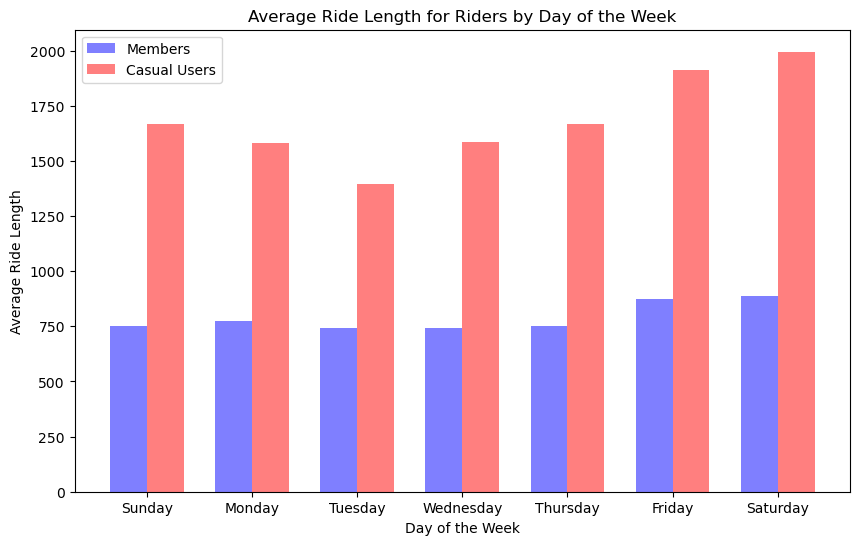

In [91]:
# Calculate the average ride length by day of the week for members and casual users
weekly_average_ride_length = data.groupby(['day_of_week', 'usertype'])['ride_length'].mean().reset_index()
weekly_average_ride_length_df = pd.DataFrame(weekly_average_ride_length)

# Set the order of days of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create separate DataFrames for members and casual users
members_df = weekly_average_ride_length_df[weekly_average_ride_length_df['usertype'] == 'member']
casual_df = weekly_average_ride_length_df[weekly_average_ride_length_df['usertype'] == 'casual']

# Plotting the bar chart
pos = list(range(len(days_of_week)))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(pos, members_df['ride_length'], width, alpha=0.5, color='b', label='Members')
plt.bar([p + width for p in pos], casual_df['ride_length'], width, alpha=0.5, color='r', label='Casual Users')

# Adding labels and titles
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(days_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length')
plt.title('Average Ride Length for Riders by Day of the Week')
plt.legend(['Members', 'Casual Users'])

# Display the chart
plt.show()

In [215]:
data.head(2)

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length,day_of_week
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0,Sunday
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0,Saturday


In [216]:
total_ride_count = data['trip_id'].count()
print("Total ride count:", total_ride_count)


Total ride count: 604817


In [218]:
ride_count_by_user_type = data.groupby('usertype')['trip_id'].count()
print(ride_count_by_user_type)


usertype
casual    234178
member    370639
Name: trip_id, dtype: int64


In [225]:
ride_count_by_user_type = data.groupby('usertype')['trip_id'].count()
total_ride_count = ride_count_by_user_type.sum()
ride_percentage_by_user_type = (ride_count_by_user_type / total_ride_count) * 100
print(ride_percentage_by_user_type)




usertype
casual    38.718819
member    61.281181
Name: trip_id, dtype: float64


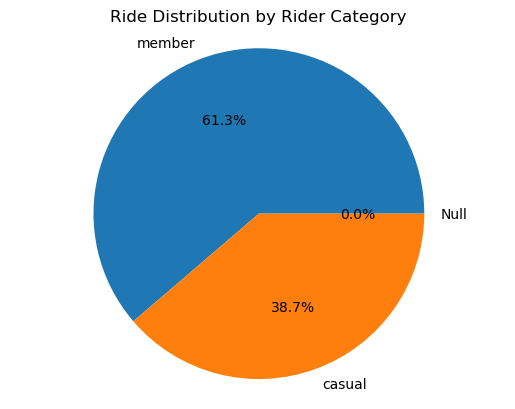

In [102]:
# Filter out null entries
filtered_data = data[data['usertype'].notnull()]

# Calculate the count of each rider category
ride_counts = filtered_data['usertype'].value_counts()

# Remove the null category from the count
ride_counts = ride_counts.dropna()

# Plot the pie chart
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%')
plt.title('Ride Distribution by Rider Category')
plt.axis('equal')
plt.show()

usertype
casual    234178
member    370639
Name: bikeid, dtype: int64


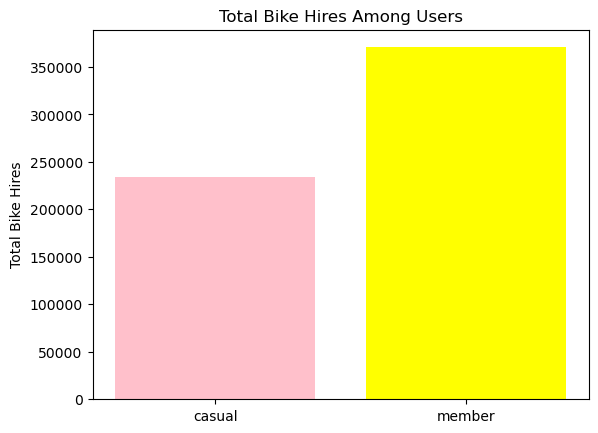

In [135]:
total_bike_hires = data.groupby('usertype')['bikeid'].count()

# Print the total bike hires among users
print(total_bike_hires)

# Define the colors for the bar chart
colors = ['pink', 'yellow']

# Create a bar chart
plt.bar(total_bike_hires.index, total_bike_hires.values, color=colors)

# Set the y-axis label
plt.ylabel('Total Bike Hires')

# Set the chart's title
plt.title('Total Bike Hires Among Users')

# Show the plot
plt.show()


usertype
casual    1711.211873
member     782.413089
Name: ride_length, dtype: float64


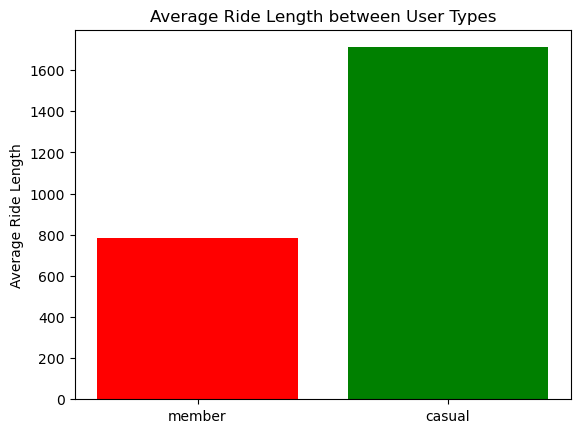

In [136]:
# Group the data by user type and calculate the mean of the ride length
average_ride_length = data.groupby('usertype')['ride_length'].mean()

# Print the average ride length
print(average_ride_length)


# Calculate the average ride length between user types
average_ride_length = data.groupby('usertype')['ride_length'].mean().sort_values()

# Assign colors based on the average ride length ranking
colors = ['red' if user == average_ride_length.idxmin() else 'green' if user == average_ride_length.idxmax() else 'skyblue' for user in average_ride_length.index]

# Create a bar chart
plt.bar(average_ride_length.index, average_ride_length.values, color=colors)

# Set the y-axis label
plt.ylabel('Average Ride Length')

# Set the chart title
plt.title('Average Ride Length between User Types')

# Show the plot
plt.show()


Ride Length:
usertype
casual    400728174.0
member    289992805.0
Name: ride_length, dtype: float64

Bike Hires:
usertype
casual    234178
member    370639
Name: bikeid, dtype: int64


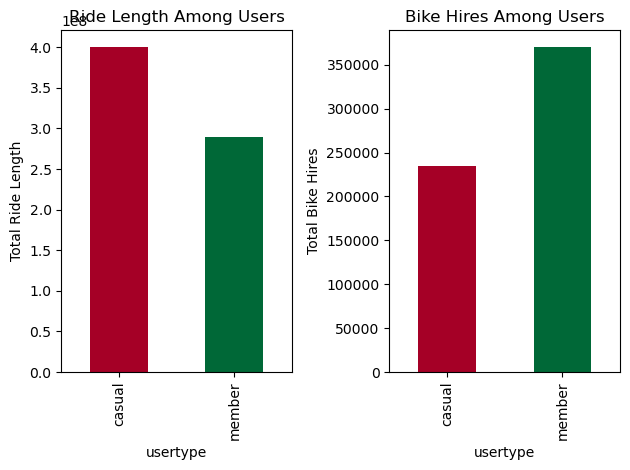

In [140]:
#compare the bike hires and ride length among usertypes 

# Group the data by user type and calculate the sum of the ride length and the count of bike hires
ride_length_sum = data.groupby('usertype')['ride_length'].sum()
bike_hires_count = data.groupby('usertype')['bikeid'].count()

# Print the ride length and bike hires
print("Ride Length:")
print(ride_length_sum)
print("\nBike Hires:")
print(bike_hires_count)

# Create a colormap ranging from red to green
colormap = plt.cm.RdYlGn(np.linspace(0, 1, len(ride_length_sum)))

# Create a bar chart for ride length with color mapping
plt.subplot(1, 2, 1)
ride_length_sum.plot(kind='bar', color=colormap)
plt.ylabel('Total Ride Length')
plt.title('Ride Length Among Users')

# Create a bar chart for bike hires with color mapping
plt.subplot(1, 2, 2)
bike_hires_count.plot(kind='bar', color=colormap)
plt.ylabel('Total Bike Hires')
plt.title('Bike Hires Among Users')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [141]:
#Determining the unique bike_types 

unique_bike_ids = data['bikeid'].unique()
print(unique_bike_ids)


['electric_bike' 'classic_bike' 'docked_bike']


In [142]:
user_bikes = data.groupby('usertype')['bikeid'].unique()
print(user_bikes)


usertype
casual    [docked_bike, electric_bike, classic_bike]
member                 [electric_bike, classic_bike]
Name: bikeid, dtype: object


bikeid    classic_bike  docked_bike  electric_bike
usertype                                          
casual         92596.0      13092.0       128490.0
member        177294.0          NaN       193345.0


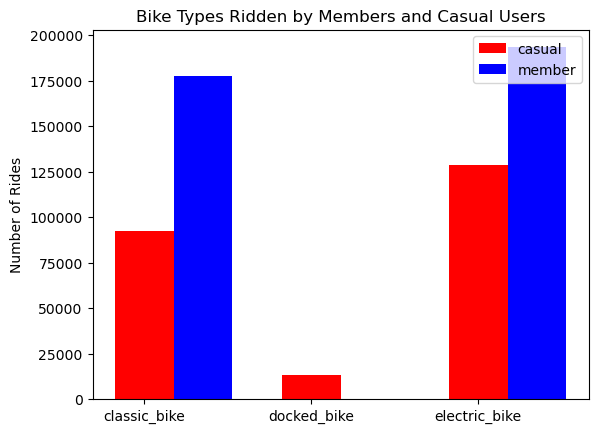

In [162]:
# Group the data by usertype and bike type, and calculate the count of rides
bike_type_counts = data.groupby(['usertype', 'bikeid'])['bikeid'].count()

# Convert the resulting series to a dataframe
bike_type_counts_df = bike_type_counts.unstack()

# Print the dataframe
print(bike_type_counts_df)


# Group the data by bike type and user type, and calculate the count of rides
bike_type_counts = data.groupby(['bikeid', 'usertype']).size().unstack()

# Get the bike types and user types
bike_types = bike_type_counts.index
user_types = bike_type_counts.columns

# Define the colors for each bike type
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Create an array of indices for the x-axis ticks
x_ticks = np.arange(len(bike_types))

# Create the grouped bar chart
fig, ax = plt.subplots()
width = 0.35

for i, user_type in enumerate(user_types):
    counts = bike_type_counts[user_type].values
    ax.bar(x_ticks + i * width, counts, width, label=user_type, color=colors[i])

# Set the x-axis tick labels to the bike types
ax.set_xticks(x_ticks)
ax.set_xticklabels(bike_types)

# Set the y-axis label
ax.set_ylabel('Number of Rides')

# Set the chart title and legend
ax.set_title('Bike Types Ridden by Members and Casual Users')
ax.legend()

# Display the chart
plt.show()

In [172]:
#Determine the day with highest bike hires

# Convert 'start_time' column to datetime format if it's not already
data['start_time'] = pd.to_datetime(data['start_time'])

# Extract the day of the week from the 'start_time' column
data['day_of_week'] = data['start_time'].dt.day_name()

# Group the data by day of the week and calculate the count of bike hires
daily_bike_hires = data.groupby('day_of_week')['bikeid'].count()

# Find the day(s) with the highest bike hires
highest_hires_days = daily_bike_hires[daily_bike_hires == daily_bike_hires.max()]

# Print the result
for day, hires in highest_hires_days.items():
    print(f"The day with the highest bike hires is {day} with {hires} hires.")


The day with the highest bike hires is Tuesday with 101060 hires.


Days with the highest bike hires:
Index(['Tuesday'], dtype='object', name='day_of_week')


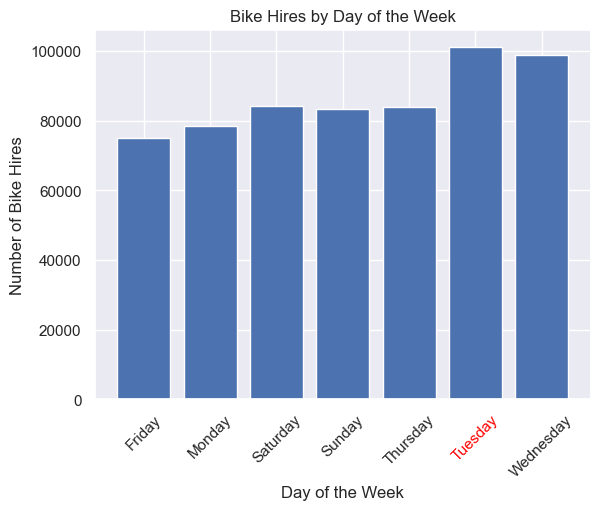

In [173]:
# Convert 'start_time' column to datetime format if it's not already
data['start_time'] = pd.to_datetime(data['start_time'])

# Extract the day of the week from the 'start_time' column and format it
data['day_of_week'] = data['start_time'].dt.day_name().str.title()

# Group the data by day of the week and calculate the count of bike hires
daily_bike_hires = data.groupby('day_of_week')['bikeid'].count()

# Find the day(s) with the highest bike hires
max_hires = daily_bike_hires.max()
days_with_max_hires = daily_bike_hires[daily_bike_hires == max_hires].index

# Print the days with the highest bike hires
print("Days with the highest bike hires:")
print(days_with_max_hires)

# Create a bar chart of bike hires by day of the week
plt.bar(daily_bike_hires.index, daily_bike_hires.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Hires')
plt.title('Bike Hires by Day of the Week')

# Highlight the days with the highest bike hires in a different color
for day in days_with_max_hires:
    plt.gca().get_xticklabels()[daily_bike_hires.index.get_loc(day)].set_color('red')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [176]:

# Group the data by day of the week and calculate the count of bike rides
daily_bike_rides = data.groupby('day_of_week')['bikeid'].count()

# Find the day with the lowest bike rides
min_rides = daily_bike_rides.min()
day_with_min_rides = daily_bike_rides[daily_bike_rides == min_rides].index[0]

# Print the day with the lowest bike rides
print("Day with the lowest bike rides:")
print(day_with_min_rides)


Day with the lowest bike rides:
Friday


In [177]:
data.head(2)

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype,ride_length,day_of_week,month
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,Null,Null,41.939408,-87.663831,41.93,-87.65,member,284.0,Sunday,5
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,Null,Null,41.939482,-87.663848,41.94,-87.69,member,567.0,Saturday,5


In [181]:
stations_available = data.groupby('from_station_name')['from_station_name'].unique()
print(stations_available)


from_station_name
2112 W Peterson Ave                      [2112 W Peterson Ave]
63rd St Beach                                  [63rd St Beach]
900 W Harrison St                          [900 W Harrison St]
Aberdeen St & Jackson Blvd        [Aberdeen St & Jackson Blvd]
Aberdeen St & Monroe St              [Aberdeen St & Monroe St]
                                             ...              
Woodlawn Ave & 55th St                [Woodlawn Ave & 55th St]
Woodlawn Ave & 75th St                [Woodlawn Ave & 75th St]
Woodlawn Ave & Lake Park Ave    [Woodlawn Ave & Lake Park Ave]
Yates Blvd & 75th St                    [Yates Blvd & 75th St]
Yates Blvd & 93rd St                    [Yates Blvd & 93rd St]
Name: from_station_name, Length: 1288, dtype: object


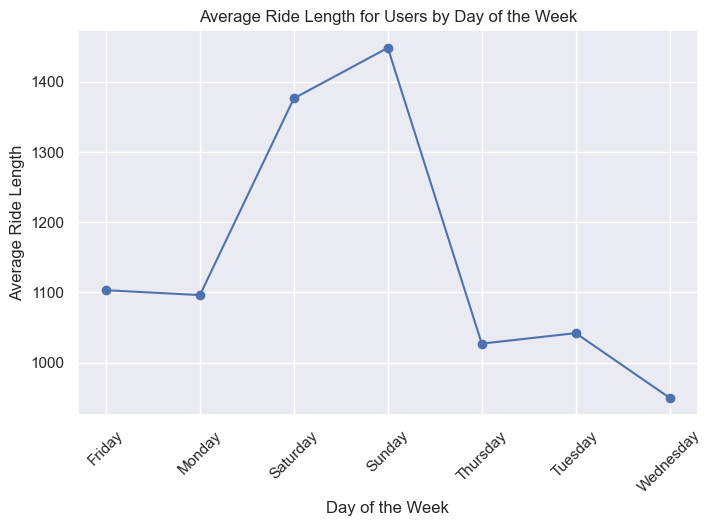

In [184]:
# Calculate the average ride length for users by day of the week
average_ride_length = data.groupby('day_of_week')['ride_length'].mean()

# Plot the average ride length
plt.figure(figsize=(8, 5))
plt.plot(average_ride_length.index, average_ride_length.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length')
plt.title('Average Ride Length for Users by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [192]:
# Group the data by 'bike_type' and count the occurrences
most_ridden_bike_type = data['bikeid'].value_counts().idxmax()

# Print the most ridden bike type
print("Most ridden bike type:", most_ridden_bike_type)


Most ridden bike type: electric_bike


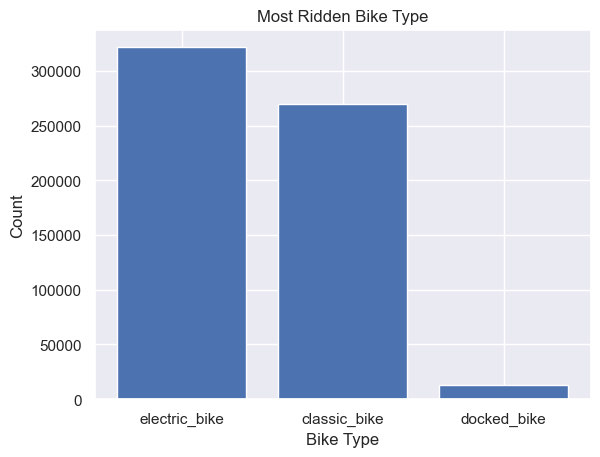

In [193]:
# Group the data by 'bike_type' and count the occurrences
bike_type_counts = data['bikeid'].value_counts()

# Plot a bar chart of bike type counts
plt.bar(bike_type_counts.index, bike_type_counts.values)
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.title('Most Ridden Bike Type')

# Show the plot
plt.show()
